In [33]:
%load_ext autoreload
%autoreload 2

import banner

topics = ['Autoencorders',
          'Climate Data',
          'Robot Kinematics',
          'Rates of Neurons Firing During Movements',
         'MNIST']

banner.reset(topics)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Topics in this Notebook

1. Autoencorders
2. Climate Data
3. Robot Kinematics
4. Rates of Neurons Firing During Movements
5. MNIST


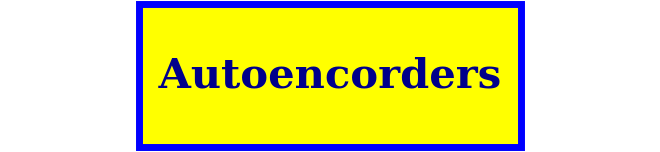

In [34]:
banner.next_topic()

# Autoencoders

In [35]:
# to interact  with plot 
#%matplotlib widget 

import numpy as np
import matplotlib.pyplot as plt

In [36]:
import neuralnetworksA4 as nn

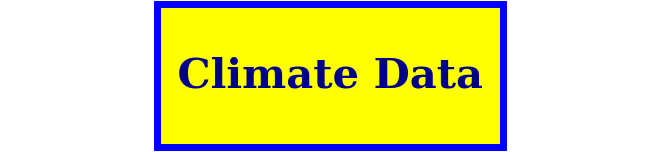

In [37]:
# plt.figure()
banner.next_topic()

## Climate Change

Patterns in [global temperature data](https://www.cs.colostate.edu/~anderson/cs545/notebooks/global_temps.npz) provide a way to investigate climate change.  This data is from the [Coupled Model Intercomparison Project Phase 5](https://pcmdi.llnl.gov/mips/cmip5/)

In [38]:
temps = np.load('global_temps.npz')
temps.files

['data', 'lats', 'lons']

In [39]:
data = temps['data']
lats = temps['lats']
lons = temps['lons']

data.shape, lats.shape, lons.shape

((29, 180, 120, 240), (120,), (240,))

The data was produced by 29 different simulations of the dynamics of the earth's atmosphere.  The simulations produced global temperatures for 180 years, from 1920 through 2100.

We are using the `cartopy` package.  You should be able to install it in your anaconda distribution using

      conda install conda-forge::cartopy

In [40]:
import cartopy.util as cutil
import cartopy.crs as ccrs
import cartopy.feature as cpf
from mpl_toolkits.axes_grid1 import make_axes_locatable  # for colorbar


def draw_on_globe(data, lats, lons, cmap='coolwarm', vmin=None, vmax=None,
                fig=None, axes=None):
    if fig is None:
        fig = plt.figure()
        
    if axes is None:
        axes = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())

    data_cyclic, lons_cyclic = cutil.add_cyclic_point(data, coord=lons)

    image = axes.pcolormesh(lons_cyclic, lats, data_cyclic,
                          cmap=cmap, vmin=vmin, vmax=vmax,
                          transform=ccrs.PlateCarree() )

    axes.coastlines();
    
    divider = make_axes_locatable(axes)
    ax_cb = divider.new_horizontal(size="5%", pad=0.1, axes_class=plt.Axes)

    plt.gcf().add_axes(ax_cb)
    plt.colorbar(image, cax=ax_cb)

    plt.sca(axes)  # in case other calls, like plt.title(...), will be made
    # return image


In [41]:
data.shape

(29, 180, 120, 240)

In [42]:
data = data - data.mean((2, 3))[:, :, np.newaxis, np.newaxis]

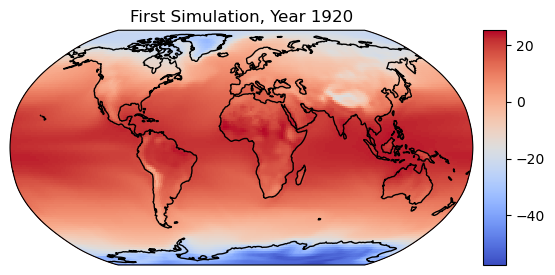

In [43]:
draw_on_globe(data[0, 0, :, :], lats, lons)
plt.title('First Simulation, Year 1920');

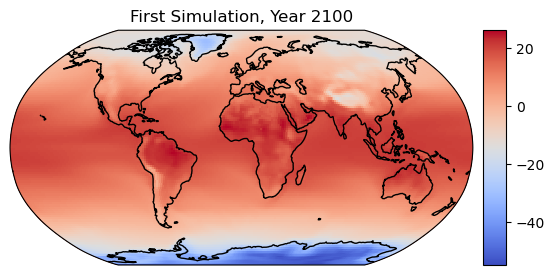

In [44]:
draw_on_globe(data[0, 179, :, :], lats, lons)
plt.title('First Simulation, Year 2100');

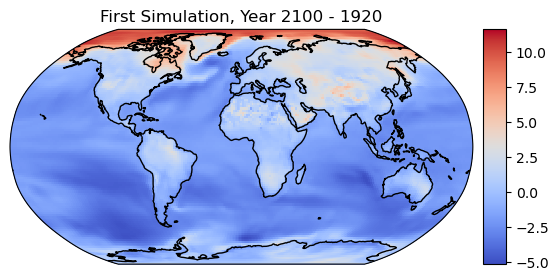

In [45]:
temperature_differences = data[0, 179, :, :] - data[0, 0, :, :]
draw_on_globe(temperature_differences, lats, lons)
plt.title('First Simulation, Year 2100 - 1920');

Let's swap the first two axes, so the first dimension is the years.  Then we will use the different years as different samples and try to project data into two dimensions and see how the years fall in the two-dimensional plane.

In [46]:
data.shape

(29, 180, 120, 240)

In [47]:
data_shifted = np.moveaxis(data, 0, 1)
data.shape, data_shifted.shape

((29, 180, 120, 240), (180, 29, 120, 240))

To save time, just use data from the first five (of 29) models.

In [48]:
X = data_shifted[:, 0:5, :, :].reshape(180, -1)
X.shape

(180, 144000)

SCG: Epoch 60 RMSE= Train 0.66920 Validate 0.66920
SCG: Epoch 120 RMSE= Train 0.66899 Validate 0.66899
SCG: Epoch 180 RMSE= Train 0.66893 Validate 0.66893
SCG: Epoch 240 RMSE= Train 0.66891 Validate 0.66891
SCG: Epoch 300 RMSE= Train 0.66890 Validate 0.66890
SCG: Epoch 360 RMSE= Train 0.66889 Validate 0.66889
SCG: Epoch 420 RMSE= Train 0.66889 Validate 0.66889
SCG: Epoch 480 RMSE= Train 0.66889 Validate 0.66889
SCG: Epoch 540 RMSE= Train 0.66889 Validate 0.66889
SCG: Epoch 600 RMSE= Train 0.66889 Validate 0.66889


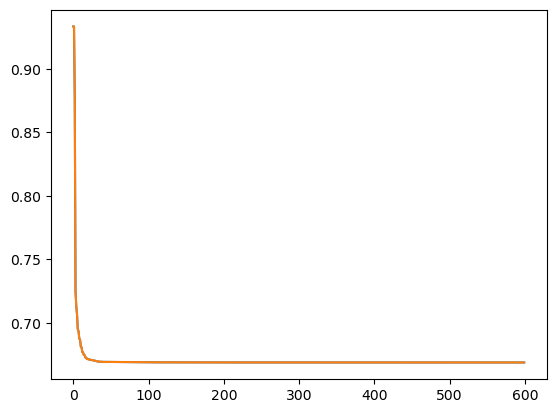

In [49]:
nnet = nn.NeuralNetwork(X.shape[1], [100, 50, 2, 50, 100], X.shape[1])

nnet.train(X, X, X, X, 600, method='scg')  # notice the target !

plt.plot(nnet.get_performance_trace());

In [50]:
len(nnet.Zs)

7

In [51]:
bottle = nnet.Zs[3]
bottle.shape

(180, 2)

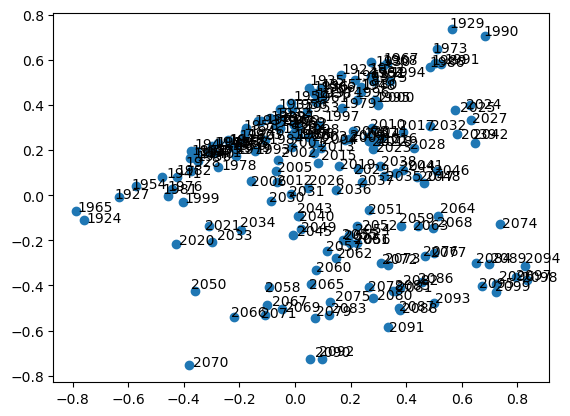

In [52]:
plt.plot(bottle[:, 0], bottle[:, 1], 'o')
r = 0.02
for year, x, y in zip(range(1920, 2100), bottle[:, 0], bottle[:, 1]):
    plt.annotate(str(year), xy=(x+np.random.uniform(-r, r),
                                y+np.random.uniform(-r, r)),
                 size=10);

In [53]:
bottle.shape

(180, 2)

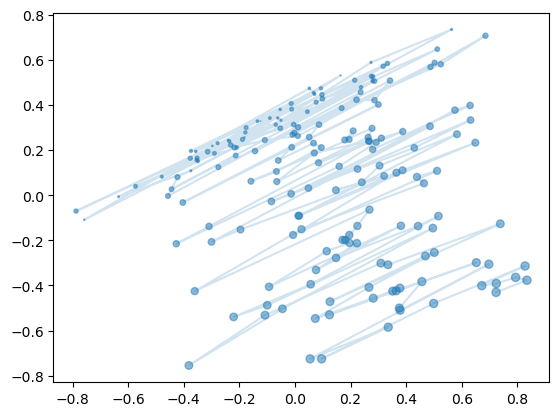

In [54]:
plt.scatter(bottle[:, 0], bottle[:, 1], s=np.arange(180)*0.2, alpha=0.5)
plt.plot(bottle[:, 0], bottle[:, 1], '-', alpha=0.2);

SCG: Epoch 60 RMSE= Train 0.66877 Validate 0.66877
SCG: Epoch 120 RMSE= Train 0.66639 Validate 0.66639
SCG: Epoch 180 RMSE= Train 0.66568 Validate 0.66568
SCG: Epoch 240 RMSE= Train 0.66544 Validate 0.66544
SCG: Epoch 300 RMSE= Train 0.66532 Validate 0.66532
SCG: Epoch 360 RMSE= Train 0.66526 Validate 0.66526
SCG: Epoch 420 RMSE= Train 0.66520 Validate 0.66520
SCG: Epoch 480 RMSE= Train 0.66515 Validate 0.66515
SCG: Epoch 540 RMSE= Train 0.66511 Validate 0.66511
SCG: Epoch 600 RMSE= Train 0.66507 Validate 0.66507


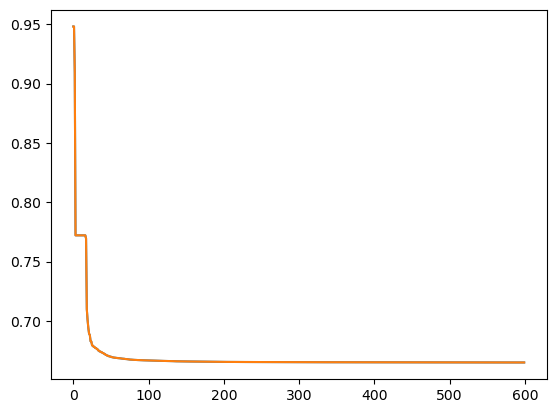

In [55]:
nnet = nn.NeuralNetwork(X.shape[1], [100, 50, 3, 50, 100], X.shape[1])

nnet.train(X, X, X, X, 600, method='scg')  # notice the target !

plt.plot(nnet.get_performance_trace());

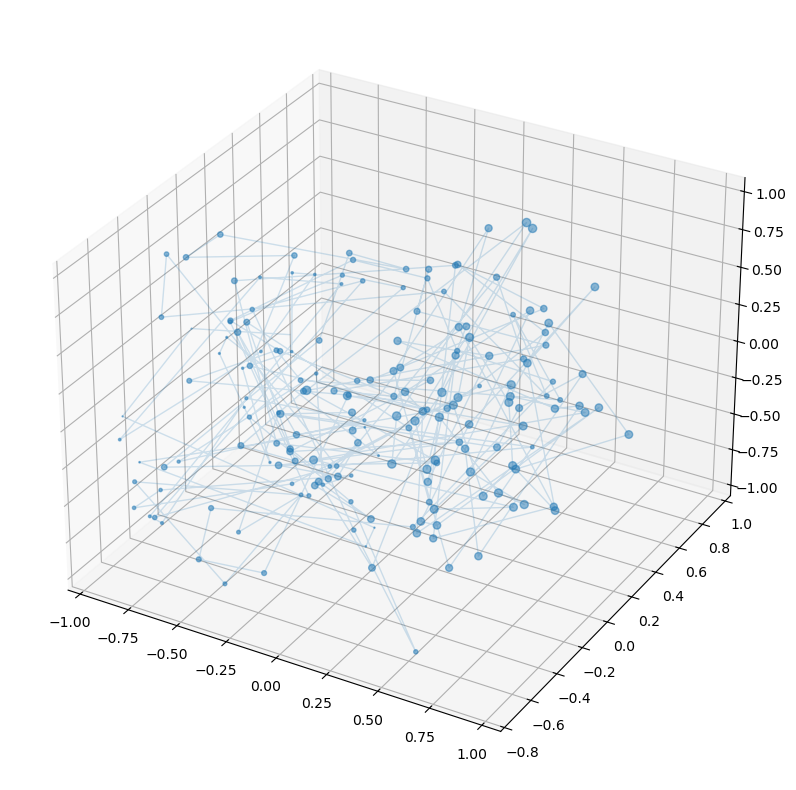

In [57]:
from mpl_toolkits.mplot3d import Axes3D

plt.figure(figsize=(10, 10))
ax = plt.subplot(projection='3d')
bottle = nnet.Zs[3]
ax.plot(bottle[:, 0], bottle[:, 1], bottle[:, 2], lw=1, alpha=0.2)
ax.scatter(bottle[:, 0], bottle[:, 1], bottle[:, 2], s=np.arange(180)*0.2, alpha=0.5);

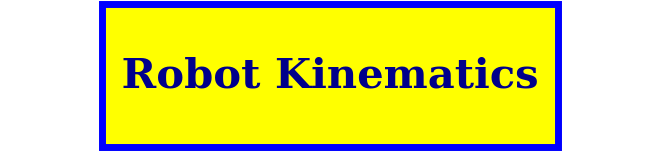

In [58]:
plt.figure()
banner.next_topic()

## Robot Kinematics

In [59]:
from math import pi
import time
import IPython.display as ipd  # for display and clear_output

class Robot():

    def __init__(self, link_lengths):
        self.n_links = len(link_lengths)
        self.link_lengths = np.array(link_lengths)
        self.joint_angles = np.zeros(self.n_links)
        self.points = [[10, 10] for _ in range(self.n_links + 1)]
        self.lim = sum(link_lengths)
        self.update_points()

    def update_joints(self, joint_angles):
        self.joint_angles = joint_angles
        self.update_points()

    def add_to_joints(self, joint_angle_deltas):
        self.joint_angles += joint_angle_deltas
        too_high = self.joint_angles > 2 * pi
        self.joint_angles[too_high] = self.joint_angles[too_high] - 2 * pi
        too_low = self.joint_angles < 0
        self.joint_angles[too_low] = self.joint_angles[too_low] + 2 * pi
        self.update_points()

    def update_points(self):
        for i in range(1, self.n_links + 1):
            self.points[i][0] = self.points[i - 1][0] + \
                self.link_lengths[i - 1] * \
                np.cos(np.sum(self.joint_angles[:i]))
            self.points[i][1] = self.points[i - 1][1] + \
                self.link_lengths[i - 1] * \
                np.sin(np.sum(self.joint_angles[:i]))

        self.end_effector = np.array(self.points[self.n_links]).T

    def get_state(self):
        return np.hstack((np.sin(self.joint_angles),
                          np.cos(self.joint_angles)))

    def plot(self, obstacles=[]):
        for i in range(self.n_links + 1):
            if i is not self.n_links:
                plt.plot([self.points[i][0], self.points[i + 1][0]],
                         [self.points[i][1], self.points[i + 1][1]], 'r-')
            plt.plot(self.points[i][0], self.points[i][1], 'k.')
       
        plt.axis('square')
        plt.xlim([-1, 21])
        plt.ylim([-1, 21])
        # plt.pause(1e-2)

    def illustrate(self):
        for i in range(10):
            action = np.random.uniform(0.1, 0.2, size=self.n_links)
            # action = np.random.choice([0, 0.2, 0, 0.2], size=self.n_links)
            # action = [0, 0, 0, 0.1]
            self.add_to_joints(action)
            self.plot()

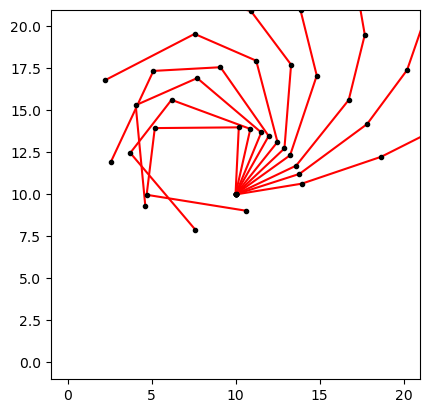

In [60]:
arm = Robot([4., 5., 4., 6.])
plt.figure()
arm.illustrate()

In [61]:
arm = Robot([4., 5., 4., 6.])
graphics = False
points = []

for i in range(1000):
    action = np.random.uniform(0.1, 0.2, size=arm.n_links)
    arm.add_to_joints(action)
    if graphics:
        plt.clf()
        arm.plot()
        ipd.clear_output(wait=True)
        ipd.display(fig)
        time.sleep(0.2)  # 0.2 seconds
    ipd.clear_output(wait=True)
 
    points.append(arm.points[1] + arm.points[2])

In [62]:
points = np.array(points)
points.shape

(1000, 4)

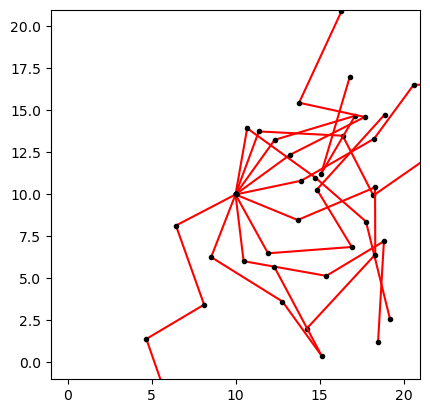

In [63]:
for p in points[:10]:
    arm.update_joints(p)
    arm.plot()

SCG: Epoch 500 RMSE= Train 0.12792 Validate 0.12792
SCG: Epoch 1000 RMSE= Train 0.11322 Validate 0.11322
SCG: Epoch 1500 RMSE= Train 0.08730 Validate 0.08730
SCG: Epoch 2000 RMSE= Train 0.06615 Validate 0.06615
SCG: Epoch 2500 RMSE= Train 0.05624 Validate 0.05624
SCG: Epoch 3000 RMSE= Train 0.04901 Validate 0.04901
SCG: Epoch 3500 RMSE= Train 0.04197 Validate 0.04197
SCG: Epoch 4000 RMSE= Train 0.03777 Validate 0.03777
SCG: Epoch 4500 RMSE= Train 0.03434 Validate 0.03434
SCG: Epoch 5000 RMSE= Train 0.03130 Validate 0.03130


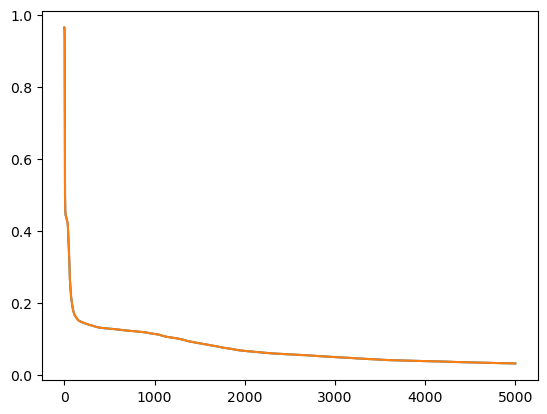

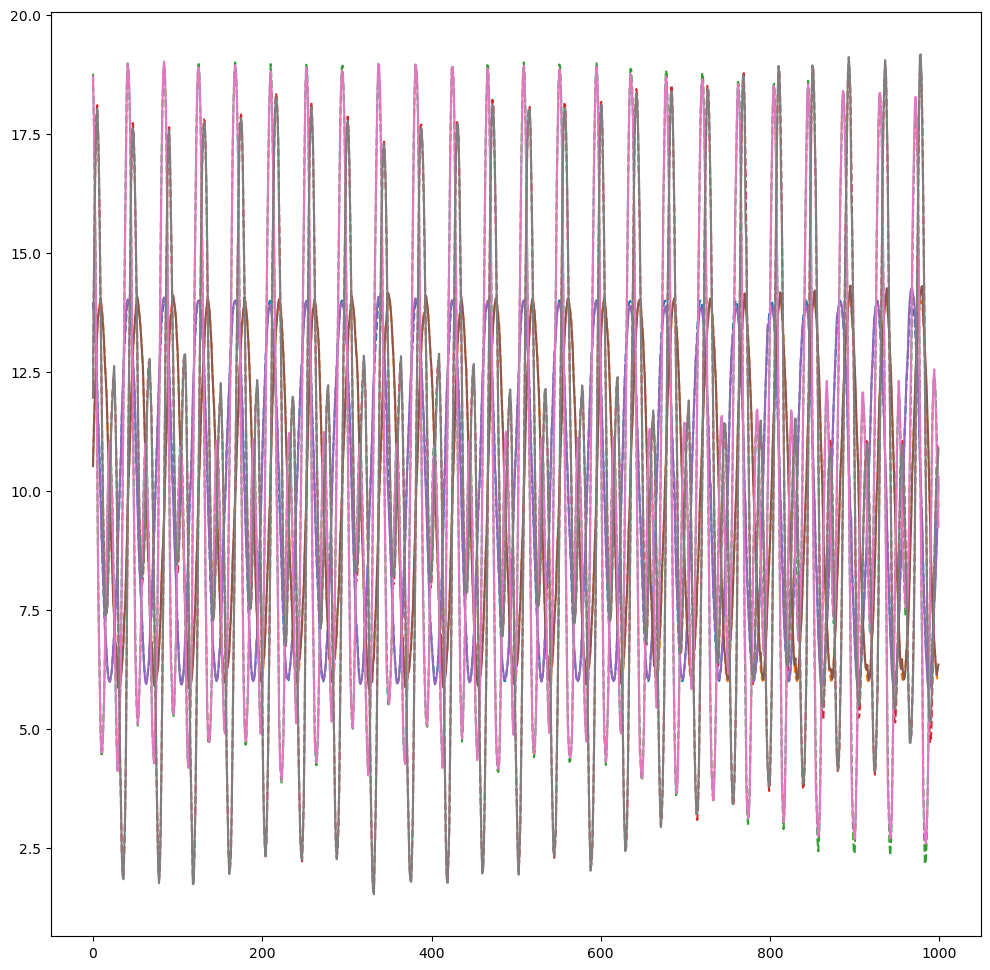

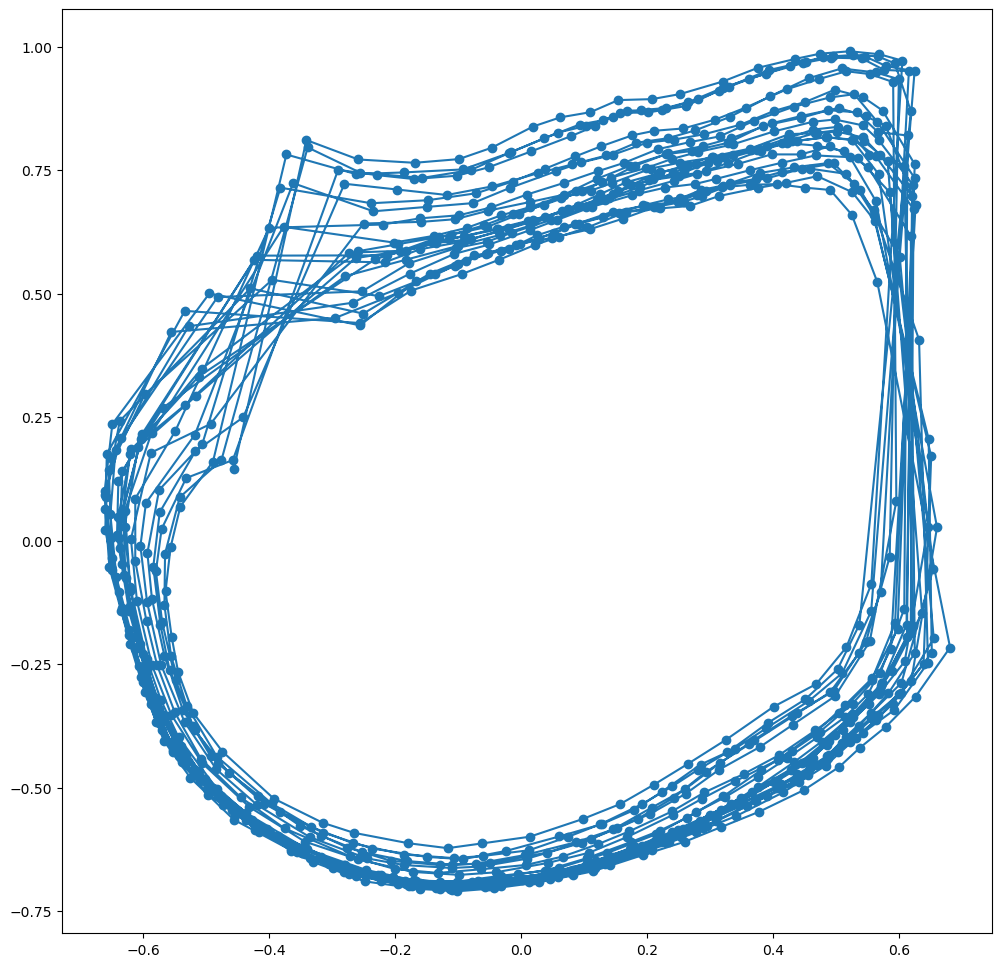

In [64]:
X = np.array(points)

nnet = nn.NeuralNetwork(X.shape[1], [100, 10, 2, 50], X.shape[1])
nnet.train(X, X, X, X, 5000, method='scg')

plt.plot(nnet.get_performance_trace())

Y = nnet.use(X)

plt.figure(figsize=(12, 12))
plt.plot(X, '--')
plt.plot(Y)

plt.figure(figsize=(12, 12))
bottle = nnet.Zs[3]
plt.plot(bottle[:, 0], bottle[:, 1], '-o');

SCG: Epoch 500 RMSE= Train 0.06241 Validate 0.06241
SCG: Epoch 1000 RMSE= Train 0.02355 Validate 0.02355
SCG: Epoch 1500 RMSE= Train 0.01512 Validate 0.01512
SCG: Epoch 2000 RMSE= Train 0.01160 Validate 0.01160
SCG: Epoch 2500 RMSE= Train 0.00903 Validate 0.00903
SCG: Epoch 3000 RMSE= Train 0.00726 Validate 0.00726
SCG: Epoch 3500 RMSE= Train 0.00604 Validate 0.00604
SCG: Epoch 4000 RMSE= Train 0.00500 Validate 0.00500
SCG: Epoch 4500 RMSE= Train 0.00409 Validate 0.00409
SCG: Epoch 5000 RMSE= Train 0.00344 Validate 0.00344


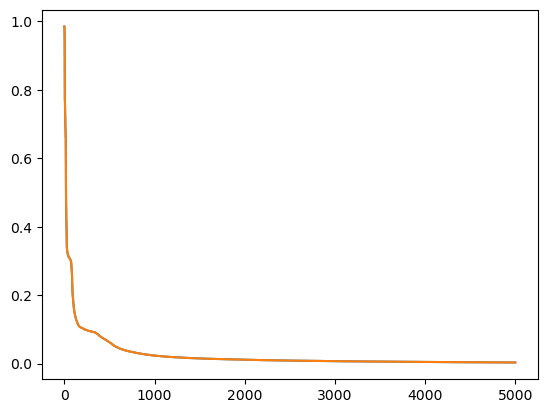

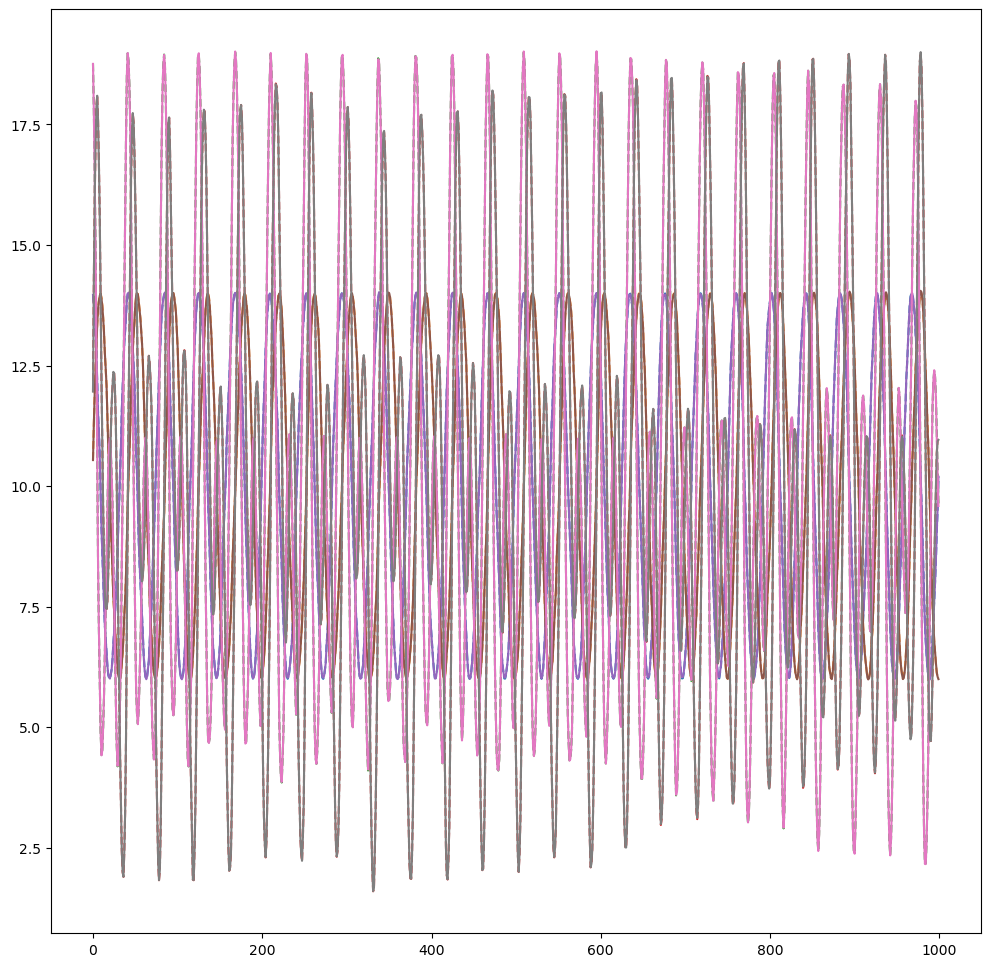

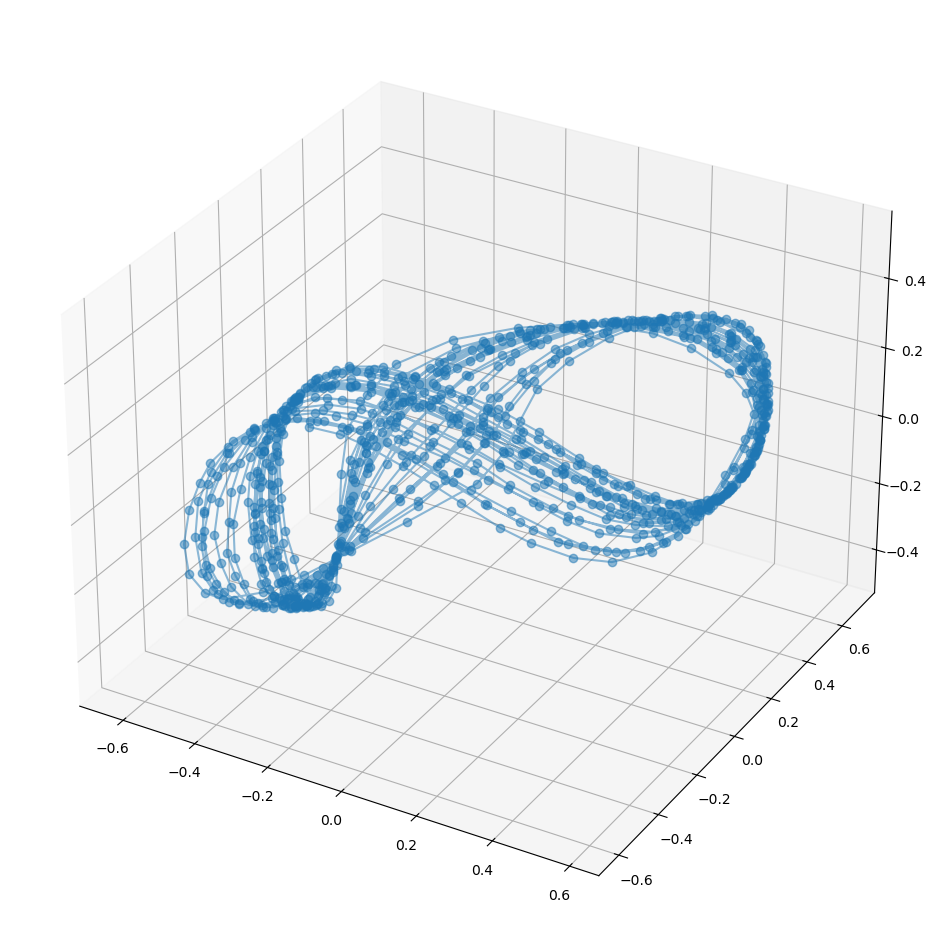

In [65]:

nnet = nn.NeuralNetwork(X.shape[1], [100, 10, 3, 10, 50], X.shape[1])
# nnet = nn.NeuralNetwork(X.shape[1], [100, 100, 50, 3, 50, 100], X.shape[1])
nnet.train(X, X, X, X, 5000, method='scg')

plt.plot(nnet.get_performance_trace())

Y = nnet.use(X)

plt.figure(figsize=(12, 12))
plt.plot(X, '--')
plt.plot(Y)

from mpl_toolkits.mplot3d import Axes3D

plt.figure(figsize=(12, 12))
ax = plt.subplot(projection='3d')
bottle = nnet.Zs[3]
plt.plot(bottle[:, 0], bottle[:, 1], bottle[:, 2], '-o', alpha=0.5);

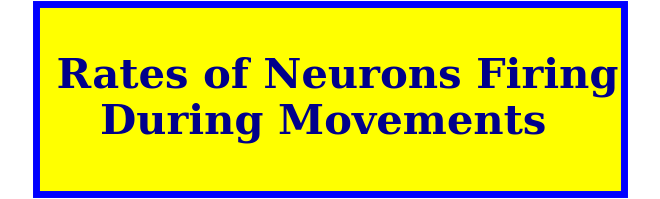

In [66]:
banner.next_topic()

## Rates of Neurons Firing During Movements

From [Neural Latents Benchmark](https://neurallatents.github.io/datasets) site. Download [this data file](https://www.cs.colostate.edu/~anderson/cs545/notebooks/neuron_rates.npz).

In [67]:
file = np.load('neuron_rates.npz')
rates = file['rates']
colors = file['colors']
rates.shape, colors.shape

((2700, 182), (27, 4))

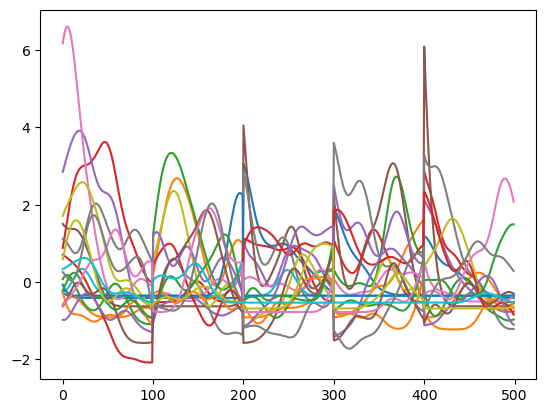

In [68]:
plt.plot(rates[:500, :20]);

In [69]:
X = rates
X.shape

(2700, 182)

In [70]:
nnet = nn.NeuralNetwork(X.shape[1], [50, 2, 50], X.shape[1])
# nnet = nn.NeuralNetwork(X.shape[1], [100, 100, 50, 3, 50, 100], X.shape[1])
nnet.train(X, X, X, X, 8000, method='scg')

SCG: Epoch 800 RMSE= Train 0.72611 Validate 0.72611
SCG: Epoch 1600 RMSE= Train 0.66074 Validate 0.66074
SCG: Epoch 2400 RMSE= Train 0.63457 Validate 0.63457
SCG: Epoch 3200 RMSE= Train 0.61462 Validate 0.61462
SCG: Epoch 4000 RMSE= Train 0.59955 Validate 0.59955
SCG: Epoch 4800 RMSE= Train 0.58910 Validate 0.58910
SCG: Epoch 5600 RMSE= Train 0.57926 Validate 0.57926
SCG: Epoch 6400 RMSE= Train 0.57089 Validate 0.57089
SCG: Epoch 7200 RMSE= Train 0.56284 Validate 0.56284
SCG: Epoch 8000 RMSE= Train 0.55628 Validate 0.55628


NeuralNetwork(182, [50, 2, 50], 182)

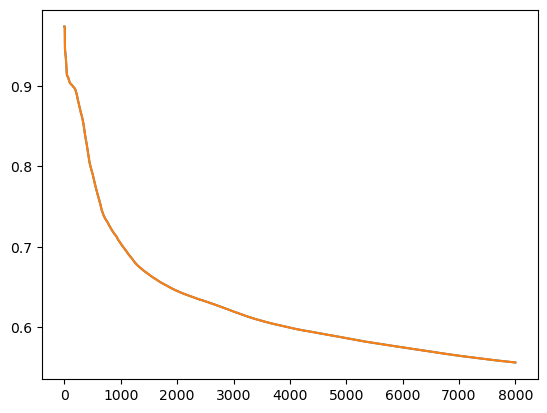

In [71]:
plt.plot(nnet.get_performance_trace());

In [72]:
Y = nnet.use(X)
bottle = nnet.Zs[2]
bottle.shape

(2700, 2)

In [73]:
n_trials = 27
bottle = bottle.reshape(n_trials, -1, 2)

In [74]:
bottle.shape

(27, 100, 2)

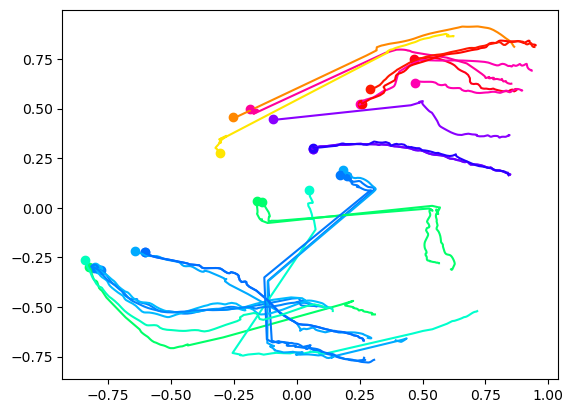

In [75]:
for trial, color in zip(bottle, colors):
    plt.plot(trial[:, 0], trial[:, 1], color=color)
    plt.scatter(trial[0, 0], trial[0, 1], color=color)

Since we are looking for "dynamics", meaning changes in time, let's try predicting the change in firing rates, rather than the firing rates themselves.

In [76]:
X_trials = X.copy().reshape(n_trials, 100, -1)
X_trials.shape

(27, 100, 182)

In [77]:
X_trials_diff = X_trials[:, 1:, :] - X_trials[:, :-1, :]
X_trials_diff.shape

(27, 99, 182)

In [78]:
X_trials = X_trials[:, :-1, :]
X_trials.shape

(27, 99, 182)

In [79]:
X_trials = X_trials.reshape(-1, 182)
X_trials_diff = X_trials_diff.reshape(-1, 182)
X_trials.shape, X_trials_diff.shape

((2673, 182), (2673, 182))

SCG: Epoch 1000 RMSE= Train 0.81202 Validate 0.81202
SCG: Epoch 2000 RMSE= Train 0.78211 Validate 0.78211
SCG: Epoch 3000 RMSE= Train 0.76127 Validate 0.76127
SCG: Epoch 4000 RMSE= Train 0.74395 Validate 0.74395
SCG: Epoch 5000 RMSE= Train 0.73215 Validate 0.73215
SCG: Epoch 6000 RMSE= Train 0.72235 Validate 0.72235
SCG: Epoch 7000 RMSE= Train 0.71469 Validate 0.71469
SCG: Epoch 8000 RMSE= Train 0.70852 Validate 0.70852
SCG: Epoch 9000 RMSE= Train 0.70267 Validate 0.70267
SCG: Epoch 10000 RMSE= Train 0.69755 Validate 0.69755


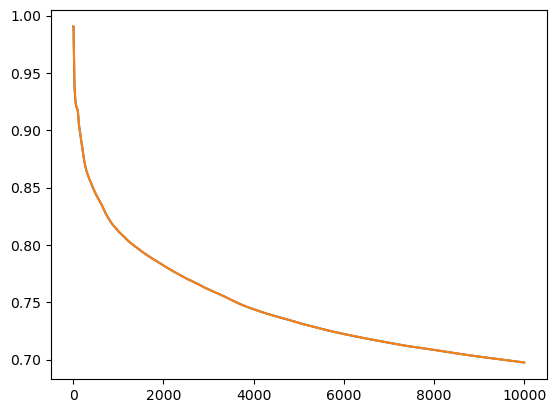

In [80]:
nnet = nn.NeuralNetwork(X.shape[1], [50, 2, 50], X.shape[1])
# nnet = nn.NeuralNetwork(X.shape[1], [100, 100, 50, 3, 50, 100], X.shape[1])
nnet.train(X_trials, X_trials_diff, X_trials, X_trials_diff, 10000, method='scg')

plt.plot(nnet.get_performance_trace());

In [81]:
Y = nnet.use(X)
bottle = nnet.Zs[2]
bottle.shape

(2700, 2)

In [82]:
n_trials = 27
bottle = bottle.reshape(n_trials, -1, 2)
bottle.shape

(27, 100, 2)

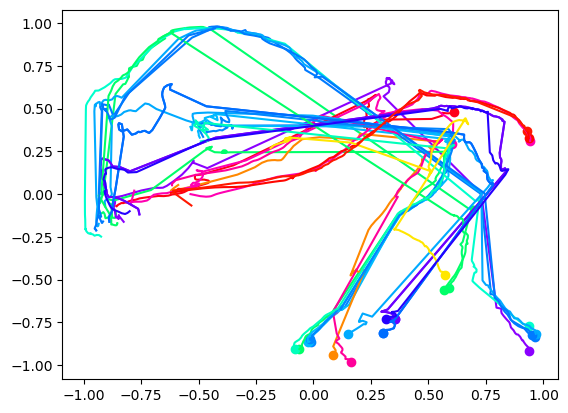

In [83]:
for trial, color in zip(bottle, colors):
    plt.plot(trial[:, 0], trial[:, 1], color=color)
    plt.scatter(trial[0, 0], trial[0, 1], color=color)

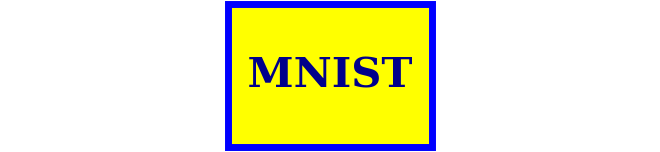

In [84]:
banner.next_topic()

# MNIST

In [89]:
import gzip
import pickle

with gzip.open('mnist.pkl.gz', 'rb') as f:
    train_set, valid_set, test_set = pickle.load(f, encoding='latin1')

Xtrain = train_set[0]
Ttrain = train_set[1].reshape(-1, 1)

Xval = valid_set[0]
Tval = valid_set[1].reshape(-1, 1)

Xtest = test_set[0]
Ttest = test_set[1].reshape(-1, 1)

print(Xtrain.shape, Ttrain.shape,  Xval.shape, Tval.shape,  Xtest.shape, Ttest.shape)

(50000, 784) (50000, 1) (10000, 784) (10000, 1) (10000, 784) (10000, 1)


SCG: Epoch 100 RMSE= Train 0.91259 Validate 0.91259
SCG: Epoch 200 RMSE= Train 0.90488 Validate 0.90488
SCG: Epoch 300 RMSE= Train 0.89836 Validate 0.89836
SCG: Epoch 400 RMSE= Train 0.88708 Validate 0.88708
SCG: Epoch 500 RMSE= Train 0.87943 Validate 0.87943
SCG: Epoch 600 RMSE= Train 0.87406 Validate 0.87406
SCG: Epoch 700 RMSE= Train 0.86687 Validate 0.86687
SCG: Epoch 800 RMSE= Train 0.86236 Validate 0.86236
SCG: Epoch 900 RMSE= Train 0.85806 Validate 0.85806
SCG: Epoch 1000 RMSE= Train 0.85336 Validate 0.85336


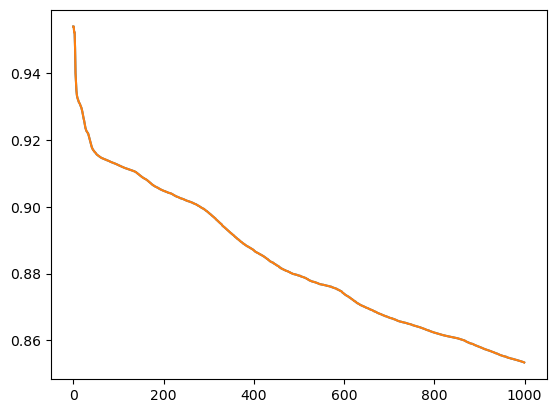

In [96]:
nnet = nn.NeuralNetwork(Xtrain.shape[1], [50, 20, 2, 20, 50], Xtrain.shape[1])
nnet.train(Xtrain, Xtrain, Xtrain, Xtrain, 1000, method='scg')

plt.plot(nnet.get_performance_trace());

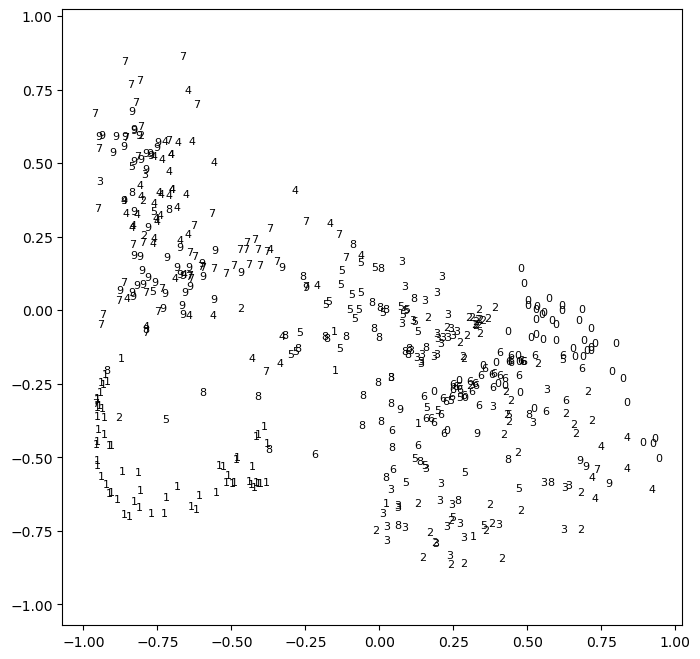

In [97]:
bottle = nnet.Zs[3]
n_plot = 500
bottle = bottle[:n_plot, :]

plt.figure(figsize=(8, 8))
for digit, x, y in zip(Ttrain[:n_plot], bottle[:, 0], bottle[:, 1]):
    plt.annotate(str(digit[0]), xy=(x, y), size=8)

a, b = np.min(bottle) * 1.1, np.max(bottle) * 1.1
plt.xlim(a, b)
plt.ylim(a, b);

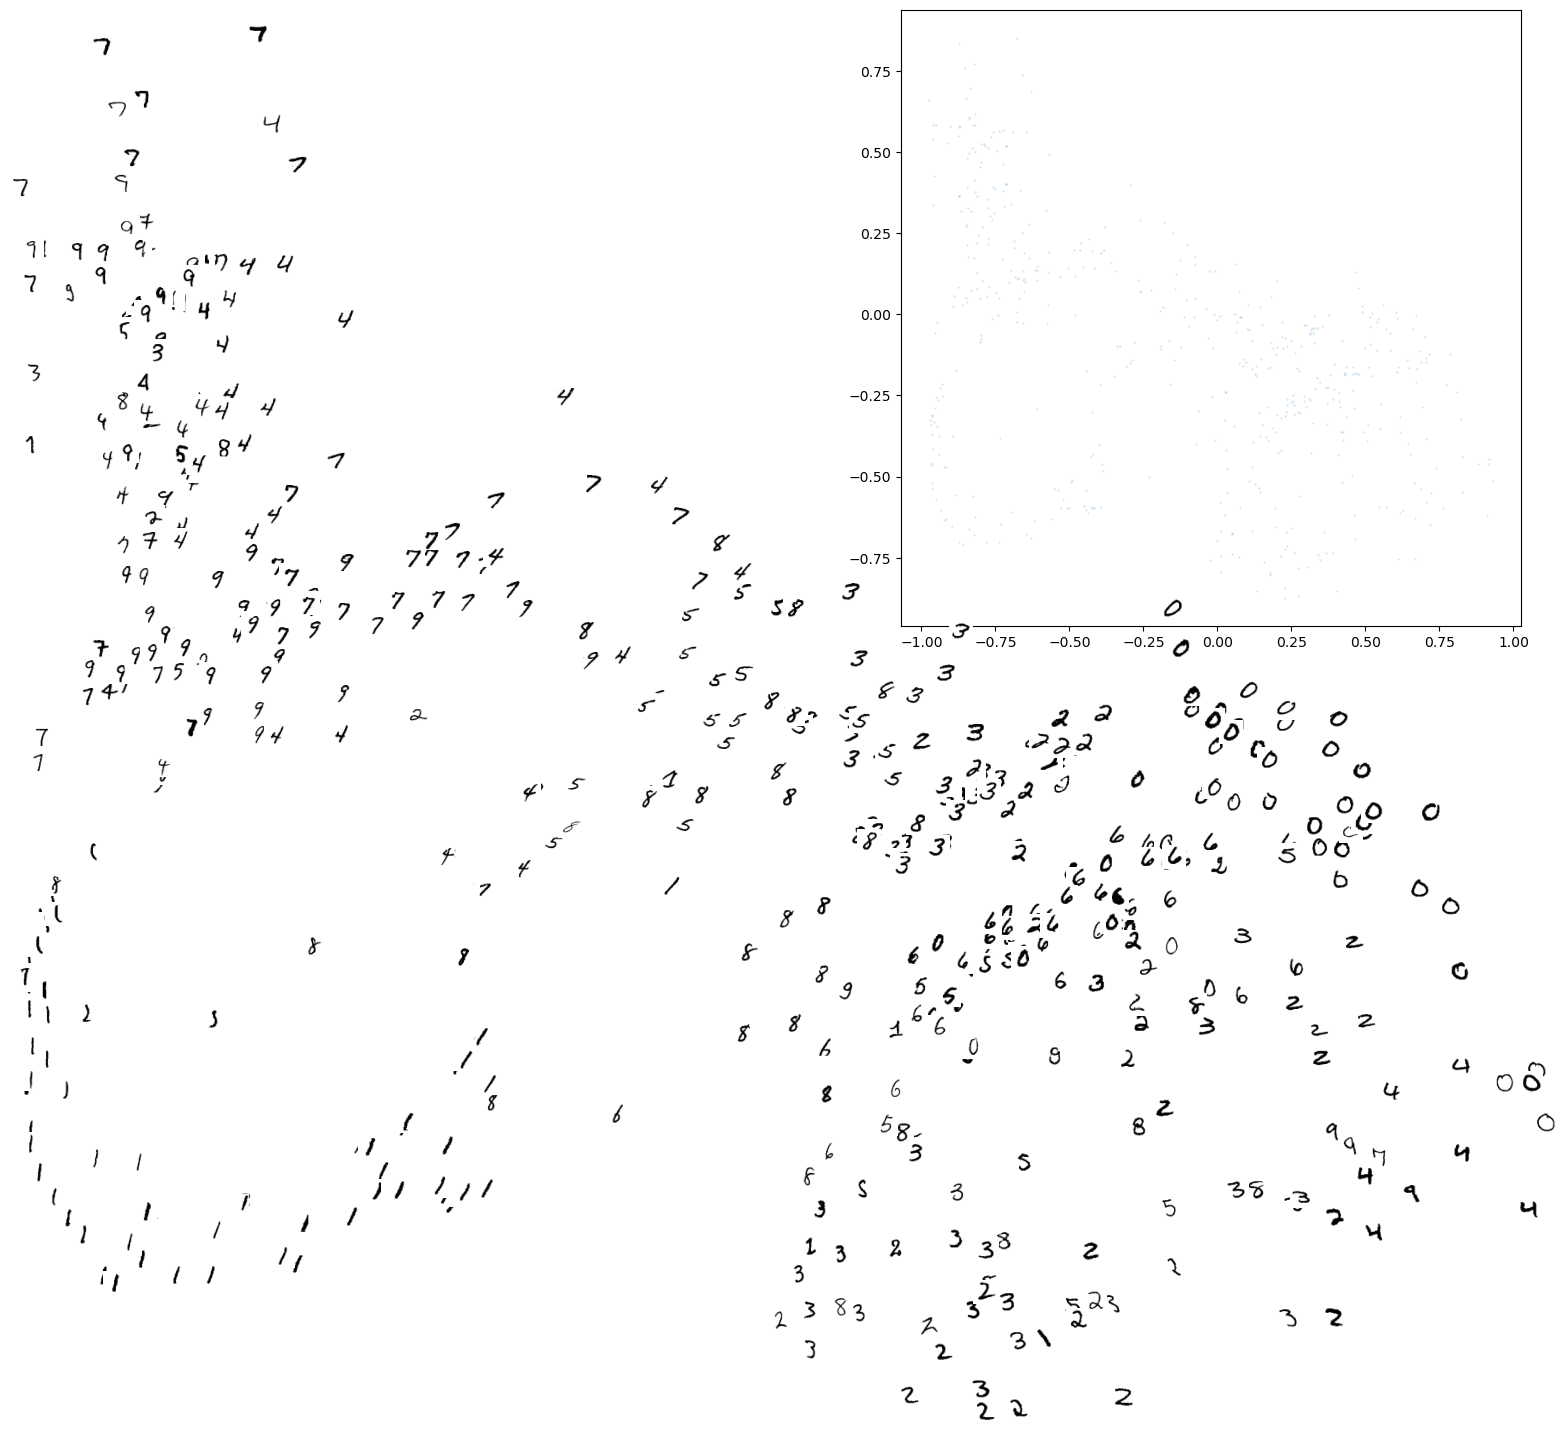

In [98]:
fig = plt.figure(figsize=(8, 8))
plt.scatter(bottle[:, 0], bottle[:, 1], s=1, alpha=0.1)

scale = 0.015
for digit, x, y in zip(Xtrain[:n_plot], bottle[:, 0], bottle[:, 1]):
    ax = fig.add_axes([x - scale, y - scale, 2 * scale, 2 * scale])
    ax.imshow(-digit.reshape(28, 28), cmap='gray')
    ax.axis('off')

SCG: Epoch 100 RMSE= Train 0.85084 Validate 0.85084
SCG: Epoch 200 RMSE= Train 0.84648 Validate 0.84648
SCG: Epoch 300 RMSE= Train 0.84269 Validate 0.84269
SCG: Epoch 400 RMSE= Train 0.83963 Validate 0.83963
SCG: Epoch 500 RMSE= Train 0.83686 Validate 0.83686
SCG: Epoch 600 RMSE= Train 0.83454 Validate 0.83454
SCG: Epoch 700 RMSE= Train 0.83258 Validate 0.83258
SCG: Epoch 800 RMSE= Train 0.83081 Validate 0.83081
SCG: Epoch 900 RMSE= Train 0.82919 Validate 0.82919
SCG: Epoch 1000 RMSE= Train 0.82789 Validate 0.82789


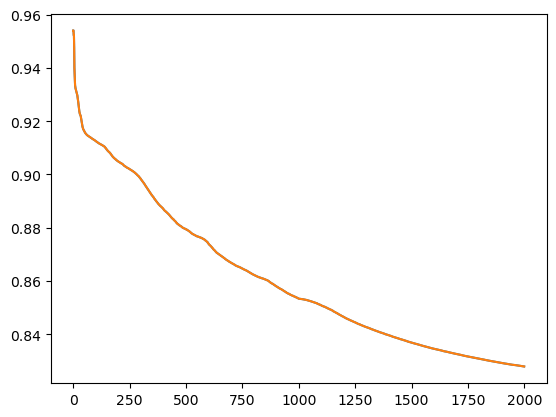

In [99]:
nnet.train(Xtrain, Xtrain, Xtrain, Xtrain, 1000, method='scg')

plt.plot(nnet.get_performance_trace());

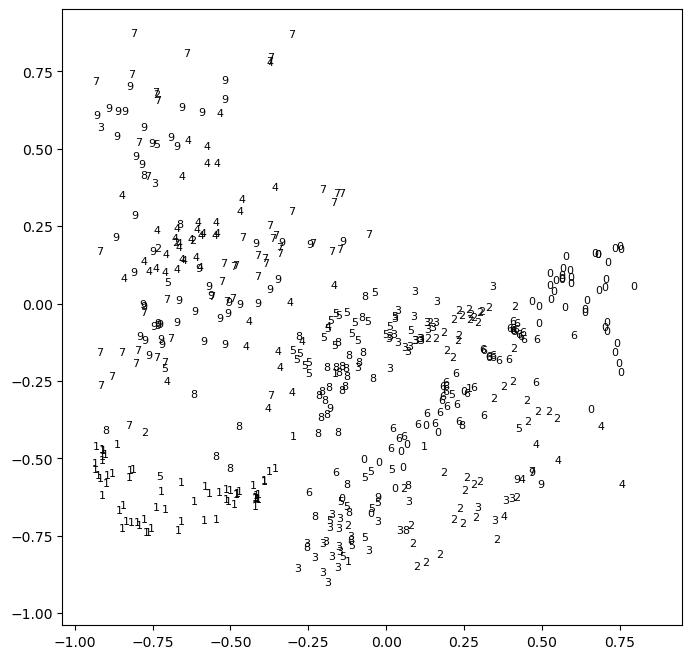

In [103]:
bottle = nnet.Zs[3]
n_plot = 500
bottle = bottle[:n_plot, :]

plt.figure(figsize=(8, 8))
for digit, x, y in zip(Ttrain[:n_plot], bottle[:, 0], bottle[:, 1]):
    plt.annotate(str(digit[0]), xy=(x, y), size=8)

a, b = np.min(bottle) * 1.1, np.max(bottle) * 1.1
plt.xlim(a, b)
plt.ylim(a, b);

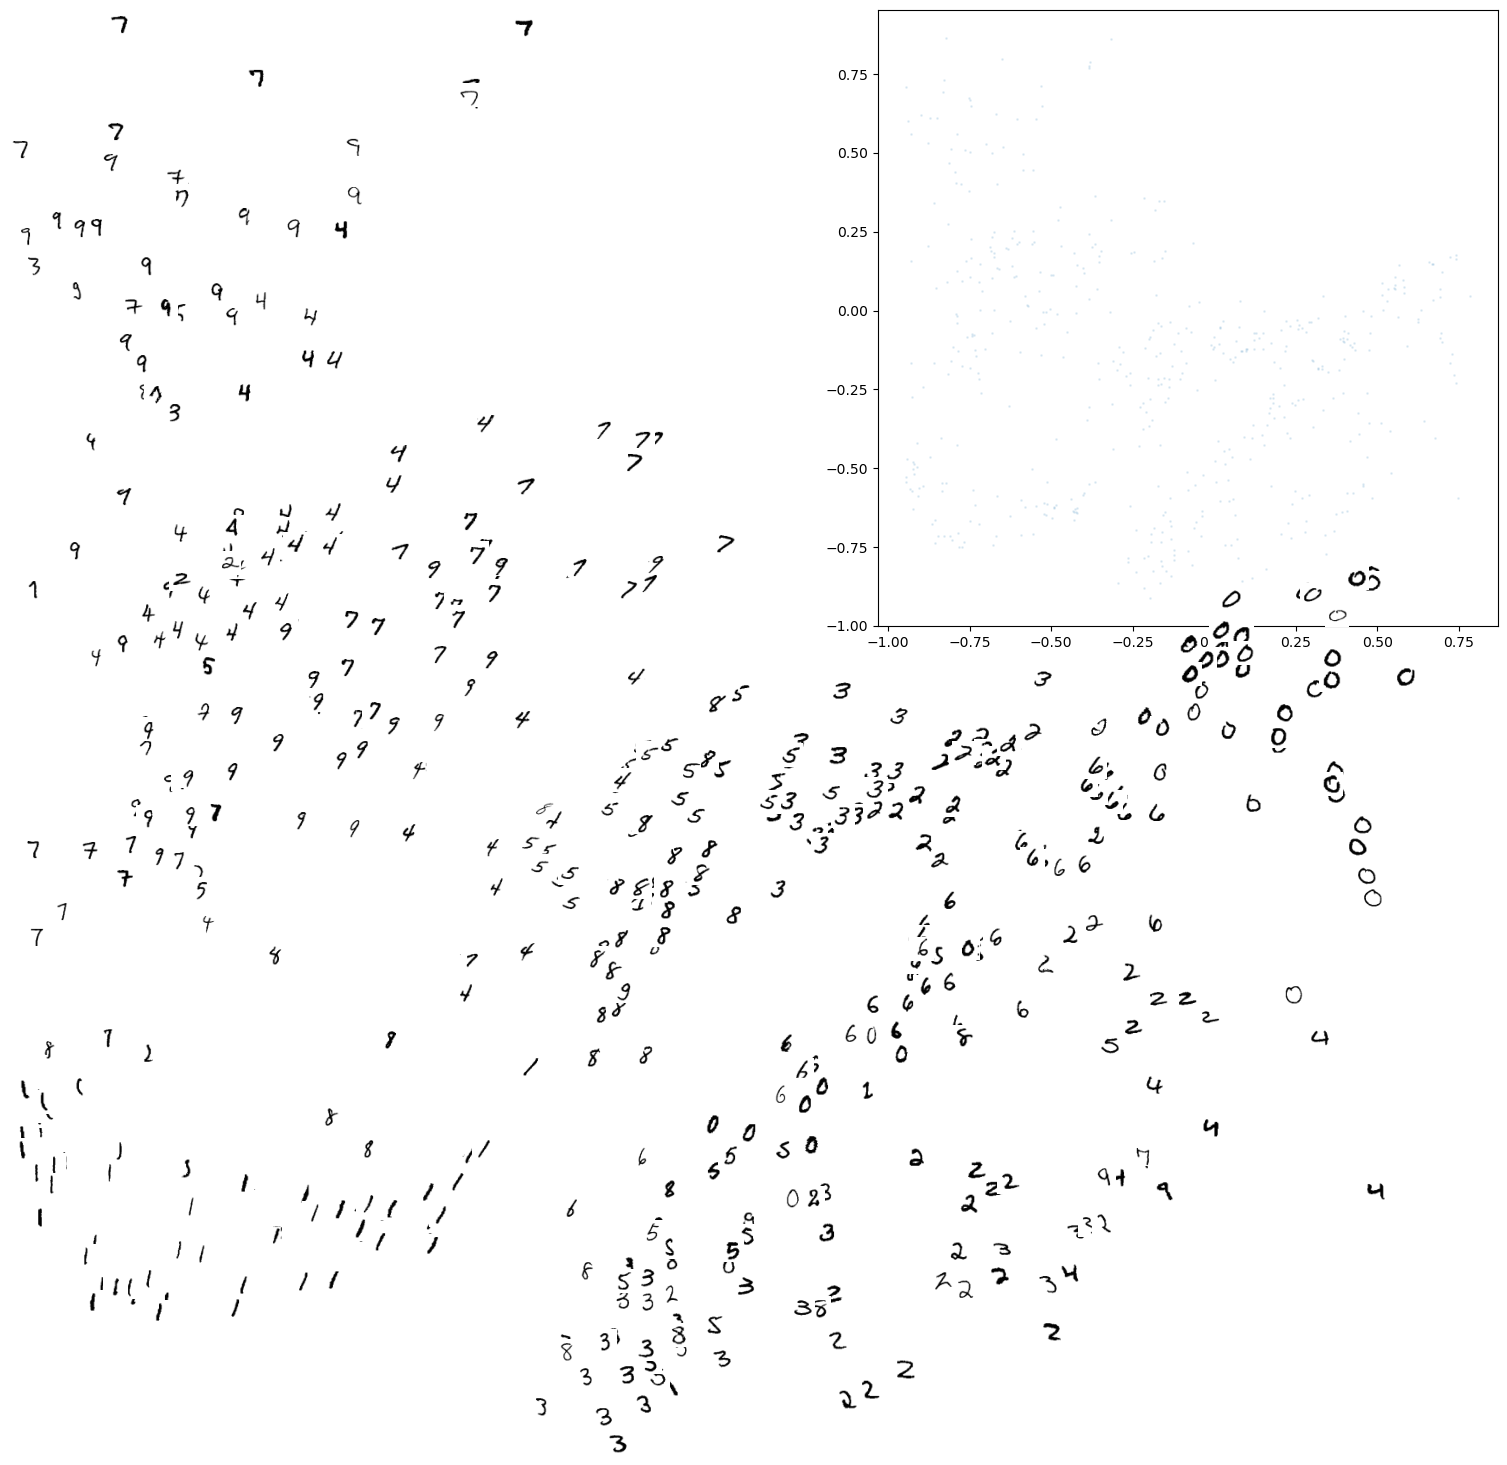

In [104]:
fig = plt.figure(figsize=(8, 8))
plt.scatter(bottle[:, 0], bottle[:, 1], s=1, alpha=0.1)

scale = 0.015
for digit, x, y in zip(Xtrain[:n_plot], bottle[:, 0], bottle[:, 1]):
    ax = fig.add_axes([x - scale, y - scale, 2 * scale, 2 * scale])
    ax.imshow(-digit.reshape(28, 28), cmap='gray')
    ax.axis('off')